In [1]:
using SemiClassicalMC
using LinearAlgebra
using HDF5
using PyPlot

### General Hamiltonian

$$H = \sum_{ij} \left(\sum_{\mu,\nu,\kappa,\lambda = x, z, y}(\sigma_i^\mu \otimes \tau_i^\kappa)\ J_{s, ij}^{\mu\nu}\ J^{\kappa\lambda}_{v, ij}\ (\sigma_j^\nu \otimes \tau_j^\lambda) + \sum_{\mu,\nu = x, y, z} \sigma^\mu_i\ K^{\mu\nu}_{s, ij}\ \sigma^\nu_j + \sum_{\kappa,\lambda = x, y, z} \tau^\kappa_i\ K^{\kappa\lambda}_{v, ij}\ \tau^\lambda_j \right)$$

### Finite temperature MC for generic nearest-neighbour model (with on-site interactions)

Define parameters

In [2]:
#Random diagonal on-site interactions
Js_onsite = diagm(rand(3))
Jv_onsite = diagm(rand(3))
Ks_onsite = diagm(rand(3))
Kv_onsite = diagm(rand(3))

onsite_interaction = [Js_onsite, Jv_onsite, Ks_onsite, Kv_onsite]

#Random nearest-neighbour interaction
Js_nn = rand(3, 3)
Jv_nn = rand(3, 3)
Ks_nn = rand(3, 3)
Kv_nn = rand(3, 3)

nn_interaction = [Js_nn, Jv_nn, Ks_nn, Kv_nn]


model = "nearest-neighbour"              #Predefined model (check Models.jl to see how to use your own model)
obs_type = Observables_generic           #Type of observables (to make custom observables possible)
latticename = "honeycomb"                #lattice
L = 3                                    #Linear extent
J = [onsite_interaction, nn_interaction] #Interaction matrices
n = 2                                    #Filling (fermions per moiré site)
T = 0.1                                  # Simulation temperature
T_i = 2.0                                #Temperature to start thermalization from (simulated annealing for thermalization sweeps)
N_therm = 30000                          #Number of thermalization sweeps
N_measure = 60000;                       #Number of measurement sweeps

There are different ways to start a calculation.  

**"Manual" way** (This also works for custom models, if instead of using `initializeCfg` one initializes their own model. See `Models.jl` for several examples.)

In [3]:
cfg = initializeCfg(model, latticename, J, L; n = n) 
obs = initializeObservables(obs_type, cfg)
run!(cfg, obs, T, T_i, N_therm, N_measure, "outfile.h5"; 
     measurement_rate = 10, checkpoint_rate = 10000, report_rate = 10000)

outfile.h5: Initializaing output ----
outfile.h5: Starting thermalization sweeps
outfile.h5: 10000/30000 thermalization sweeps. T = 0.5282, R = 0.5222, σ = 0.08824.
outfile.h5: 20000/30000 thermalization sweeps. T = 0.1395, R = 0.5167, σ = 0.04092.
outfile.h5: 30000/30000 thermalization sweeps. T = 0.1, R = 0.4083, σ = 0.02978.
outfile.h5: Starting measurement sweeps at sweep 0/60000, T = 0.1. R = 0.4083, σ = 0.02978.
outfile.h5: 10000/60000 measurement sweeps at 0.5292 acceptance rate.
outfile.h5: 20000/60000 measurement sweeps at 0.5301 acceptance rate.
outfile.h5: 30000/60000 measurement sweeps at 0.5293 acceptance rate.
outfile.h5: 40000/60000 measurement sweeps at 0.5303 acceptance rate.
outfile.h5: 50000/60000 measurement sweeps at 0.529 acceptance rate.
outfile.h5: 60000/60000 measurement sweeps at 0.5286 acceptance rate.
outfile.h5: Measurement sweeps finished. Ending calculation.
outfile.h5: Calculation finished


**launch! function** (only for predefined models)

In [4]:
launch!("outfile.h5", model, obs_type, latticename, L, J, T, T_i, N_therm, N_measure;
            measurement_rate = 10, checkpoint_rate = 10000, report_rate = 10000, 
            normalize = true, overwrite = true, n = 2)

outfile.h5: Overwrite = true, starting from scratch.
outfile.h5: Initializaing output ----
outfile.h5: Starting thermalization sweeps
outfile.h5: 10000/30000 thermalization sweeps. T = 0.5282, R = 0.7861, σ = 60.0.
outfile.h5: 20000/30000 thermalization sweeps. T = 0.1395, R = 0.5, σ = 0.3245.
outfile.h5: 30000/30000 thermalization sweeps. T = 0.1, R = 0.475, σ = 0.07606.
outfile.h5: Starting measurement sweeps at sweep 0/60000, T = 0.1. R = 0.475, σ = 0.07606.
outfile.h5: 10000/60000 measurement sweeps at 0.5162 acceptance rate.
outfile.h5: 20000/60000 measurement sweeps at 0.5143 acceptance rate.
outfile.h5: 30000/60000 measurement sweeps at 0.5143 acceptance rate.
outfile.h5: 40000/60000 measurement sweeps at 0.5166 acceptance rate.
outfile.h5: 50000/60000 measurement sweeps at 0.516 acceptance rate.
outfile.h5: 60000/60000 measurement sweeps at 0.5171 acceptance rate.
outfile.h5: Measurement sweeps finished. Ending calculation.
outfile.h5: Calculation finished


Create **"launcher file"**, useful for cluster calculations (file calls launch! function):

In [5]:
#Save launcher file
saveLauncher("launcher.jl", "outfile.jl", model, obs_type, latticename, L, J, T, T_i, N_therm, N_measure;
            measurement_rate = 10, checkpoint_rate = 10000, report_rate = 10000, 
            normalize = true, overwrite = true, n = 2)

#Run file
include("launcher.jl")

outfile.jl: Overwrite = true, starting from scratch.
outfile.jl: Initializaing output ----
outfile.jl: Starting thermalization sweeps
outfile.jl: 10000/30000 thermalization sweeps. T = 0.5282, R = 0.7472, σ = 60.0.
outfile.jl: 20000/30000 thermalization sweeps. T = 0.1395, R = 0.5278, σ = 0.2903.
outfile.jl: 30000/30000 thermalization sweeps. T = 0.1, R = 0.4694, σ = 0.08165.
outfile.jl: Starting measurement sweeps at sweep 0/60000, T = 0.1. R = 0.4694, σ = 0.08165.
outfile.jl: 10000/60000 measurement sweeps at 0.5428 acceptance rate.
outfile.jl: 20000/60000 measurement sweeps at 0.5428 acceptance rate.
outfile.jl: 30000/60000 measurement sweeps at 0.5457 acceptance rate.
outfile.jl: 40000/60000 measurement sweeps at 0.5431 acceptance rate.
outfile.jl: 50000/60000 measurement sweeps at 0.5447 acceptance rate.
outfile.jl: 60000/60000 measurement sweeps at 0.5438 acceptance rate.
outfile.jl: Measurement sweeps finished. Ending calculation.
outfile.jl: Calculation finished


### Simulated annealing su2xsu2 model

Starting a simulated annealing simulation works the similar to a finite temperature calculation, just with the functions `runAnnealing!`, `launchAnnealing!`, `saveLauncherAnnealing!` and with slightly different arguments.

In [6]:
model = "su2xsu2"                        #Predefined model
obs_type = Observables_generic_annealing #Type of observables (to make custom observables possible)
latticename = "honeycomb"                #lattice
L = 6                                    #Linear extent
J = [0.3, 1.0, -0.3]                     #Couplings (J, Js, Jv)
T_i = 2.0                                #Temperature to start simulated annealing from
n = 1                                    #Filling (per site)

saveLauncherAnnealing("launcher_annealing.jl", "annealing.h5", model, obs_type, latticename, L, J, T_i;
             T_fac = 0.98, N_max = 1000000, N_o = 10, N_per_T = 100, min_acc_per_site = 10, 
             min_accrate = 1e-3, measurement_rate = 100, checkpoint_rate = 2000, σ_min = 0.05, 
             verbose = false, n = n, overwrite = true)

include("launcher_annealing.jl")

annealing.h5: Overwrite = true, starting from scratch.
annealing.h5: Starting annealing sweeps at 1/1000000, T = 2.0, E = 0.07685
annealing.h5: Generating checkpoint after 2000/1000000 sweeps, T = 0.03971, E = -2.083, R = 0.5521, σ = 0.05
annealing.h5: Generating checkpoint after 4000/1000000 sweeps, T = 0.005945, E = -2.191, R = 0.1074, σ = 0.05
annealing.h5: Generating checkpoint after 6000/1000000 sweeps, T = 0.003377, E = -2.199, R = 0.05, σ = 0.05
annealing.h5: Generating checkpoint after 8000/1000000 sweeps, T = 0.002254, E = -2.203, R = 0.02361, σ = 0.05
annealing.h5: Generating checkpoint after 10000/1000000 sweeps, T = 0.001505, E = -2.205, R = 0.008056, σ = 0.05
annealing.h5: Generating checkpoint after 12000/1000000 sweeps, T = 0.001005, E = -2.206, R = 0.003333, σ = 0.05
annealing.h5: Generating checkpoint after 14000/1000000 sweeps, T = 0.0006707, E = -2.207, R = 0.002222, σ = 0.05
annealing.h5: Minimal acceptance rate reached at 14776/1000000 sweeps, T = 0.0005823, E = -2

Calculate structure factor of minimized configuration

maximum.(sfs) = [26.99974867274286, 26.99994020323278, 35.99974459673522]


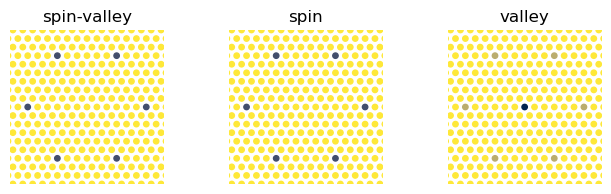

In [14]:
#Load checkpoint (contains last configuration)
cfg, obs, current_sweep, energy, βs, σ = readCheckpoint("annealing.h5", obs_type)
correlations = obs.correlations[end] #Last observable is minimization result (also in file["res/"])

#All possible distances between lattice points
rs = getRs(cfg.positions, cfg.basis) #correlation[i] corresponds to \chi(rs[i])

#Allowed momenta in square box
ks = getKsInBox(latticename, L; kx_lim = 4π, ky_lim = 4π)

#Compute different structure factor components ~ sum_(i in components) S^i S^i
sf_spinvalley = computeStructureFactor(correlations, rs, ks; components = 7:15);
sf_spin = computeStructureFactor(correlations, rs, ks; components = 1:3)
sf_valley = computeStructureFactor(correlations, rs, ks; components = 4:6)

sfs = [sf_spinvalley, sf_spin, sf_valley]
vmin = minimum(minimum.(sfs))
vmax = maximum(maximum.(sfs))

kx = [k[1] for k in ks]
ky = [k[2] for k in ks]

fig, ax = subplots(1, 3, figsize = (8, 2))

ax[1].scatter(kx, ky; c = sf_spinvalley, s = 15, cmap = "cividis_r", vmin = vmin, vmax = vmax)
ax[1].set_title("spin-valley")

ax[2].scatter(kx, ky; c = sf_spin, s = 15, cmap = "cividis_r", vmin = vmin, vmax = vmax)
ax[2].set_title("spin")

ax[3].scatter(kx, ky; c = sf_valley, s = 15, cmap = "cividis_r", vmin = vmin, vmax = vmax)
ax[3].set_title("valley")

@show maximum.(sfs)

for a in ax
    a.set_aspect("equal")
    a.axis("off")
    a.set_xlim(-3π, 3π)
    a.set_ylim(-3π, 3π)
end

## Starting multiple launcher files in one job file (using slurm)

One can run multiple parameters (Temperate/Couplings) in one job using slurms jobsteps. Here we give an example of running multiple temperatures in one job for an su2xsu2-symmetric model at quarter filling.

In [12]:
#Create launcher files
J = 0.1
Js = 3.0
Jv = 0.5
J = [J, Js, Jv]
n = 1                                   
Ts = 0.1:0.1:1

rm("su2xsu2", recursive = true)
mkdir("su2xsu2")
for T in Ts
    saveLauncher("su2xsu2/MC_$T.jl", "MC_$T.jl", "su2xsu2", Observables_generic, "triangular", 3, J, T, 2.0, 10000, 50000;
              measurement_rate = 10, checkpoint_rate = 10000, report_rate = 10000, 
              normalize = true, overwrite = true, n = n)
end

#Create job file
sbatch_args = Dict("ntasks" => "$(length(Ts))", "cpus-per-task" => "1", "time" => "2:00:00")

jobfile = "su2xsu2/MC.job" 
dir = abspath("su2xsu2")    # Folder where launcher files are
prefix = "MC"               # All files in
labels = Ts

makeJobSteps(jobfile, dir, "MC", Ts, "module reset; module load lang; module load JuliaHPC", sbatch_args)